<a href="https://colab.research.google.com/github/mennaHassanin/Exploratory_Data_Analysis/blob/main/%5BEDA%5DBank_Customer_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the file

In [ ]:
!ls  # This lists all files in the current directory

kaggle.json  sample_data


In [ ]:
!mkdir -p ~/.kaggle  # Create the .kaggle directory
!cp kaggle.json ~/.kaggle/  # Move kaggle.json into the .kaggle folder


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json  # Set file permissions to secure the file

In [ ]:
! kaggle competitions download -c playground-series-s4e1

  0% 0.00/6.81M [00:00<?, ?B/s]
100% 6.81M/6.81M [00:00<00:00, 78.1MB/s]


In [ ]:
! unzip /content/playground-series-s4e1.zip

Archive:  /content/playground-series-s4e1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
! kaggle datasets download -d shubhammeshram579/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction
License(s): CC0-1.0
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 80.5MB/s]


In [ ]:
! unzip /content/bank-customer-churn-prediction.zip

Archive:  /content/bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [ ]:
import os

# specify the file path and current file name
old_file_path = "/content/Churn_Modelling.csv"

# specify the new file name
new_file_name = "original.csv"
dir_path = os.path.dirname(old_file_path)

# construct the new file path
new_file_path = os.path.join(dir_path, new_file_name)

# use the rename() method to rename the file
os.rename(old_file_path, new_file_path)

# EDA

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/original.csv')
df = pd.DataFrame(data)

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## Check for duplicates

In [ ]:
df.duplicated().sum() # two duplicates found in the original dataset

2

## Explore Unique Values

In [ ]:
for col in df.columns:
  print(f'{col}: \n {df[col].unique()}')

RowNumber: 
 [    1     2     3 ...  9998  9999 10000]
CustomerId: 
 [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname: 
 ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: 
 [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 8

## Check for Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


* Columns `[Age]` can't be float, So Instead we need to convert it into int
* Columns `[Tenure,HasCrCard,IsActiveMember,Exited]` can't be int,so insted we need to convert them into category

## View Statistical analysis of data

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


*   There are some outliers in `[Age,Balance,EstimatedSalary] ` based on the mean and max

## Check Missing Values

In [ ]:
df.isna().sum() # Four Columns contain null values [Geography,Age,HasCrCard,IsActiveMember]

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


* There is many ways to solve the missing values:
  1. Use the mode and median to fill the missing values.
  2. Use ML perdiction model like KNN or Descision Tree.
- We will Implement the both ways and train on each of them to see if there is a huge difference.

# Data Preprocessing

## Drop unwanted Features

In [ ]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

## Drop Duplicates

In [ ]:
df=df.drop_duplicates()

## Handle Missing Values

In [ ]:
# Filling the missing values by using mode and median
df1=df.copy()
df1['Age']=df1['Age'].fillna(df1['Age'].median())
df1['Geography']=df1['Geography'].fillna(df1['Geography'].mode()[0])
df1['HasCrCard']=df1['HasCrCard'].fillna(df1['HasCrCard'].mode()[0])
df1['IsActiveMember']=df1['Geography'].fillna(df1['IsActiveMember'].mode()[0])

In [ ]:
df1.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## Converting Datatypes

In [ ]:
df1['Age'] = df1['Age'].astype('int64')
df1['HasCrCard'] =  df1['HasCrCard'].astype('category')
df1['IsActiveMember'] = df1['IsActiveMember'].astype('category')
df1['Tenure'] = df1['Tenure'].astype('category')
df1['Exited'] = df1['Exited'].astype('category')
df1['NumOfProducts'] = df1['NumOfProducts'].astype('category')
for col in df1.select_dtypes(include='object').columns:
  df1[col]=df1[col].astype('category')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  category
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(7), float64(2), int64(2)
memory usage: 460.2 KB


## Handle Outliers

In [ ]:
# Since the credit score data grapgh is skewed to the right and Age is skewed to left, the most suitable solution is 'Log Transformation'
import numpy as np

col_outliers1=['CreditScore','Age']

for col in col_outliers1:
  lower_limit = df1[col].quantile(0.05)
  upper_limit = df1[col].quantile(0.95)
  df1[col] = df1[col].clip(lower=lower_limit, upper=upper_limit)

In [ ]:
for col in col_outliers1:
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    df1[col].hist(bins=30)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    df1[col].plot(kind='box')
    plt.show()

NameError: name 'plt' is not defined

# Data Visualization

In [ ]:
numerical_col=[col for col in df1.select_dtypes(include=['int64','float64']).columns]
categorical_col = [col for col in df1.select_dtypes(include='category').columns if col!='Exited']
print(numerical_col)
print(categorical_col)

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
for col in numerical_col:
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    df1[col].hist(bins=30)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.subplot(1, 2, 2)
    df1[col].plot(kind='box')
    plt.show()

In [ ]:
palette = sns.color_palette("Set2")
for i, col in enumerate(categorical_col):
    plt.figure(figsize=(5, 5))
    sns.countplot(x=df1[col], palette=palette)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

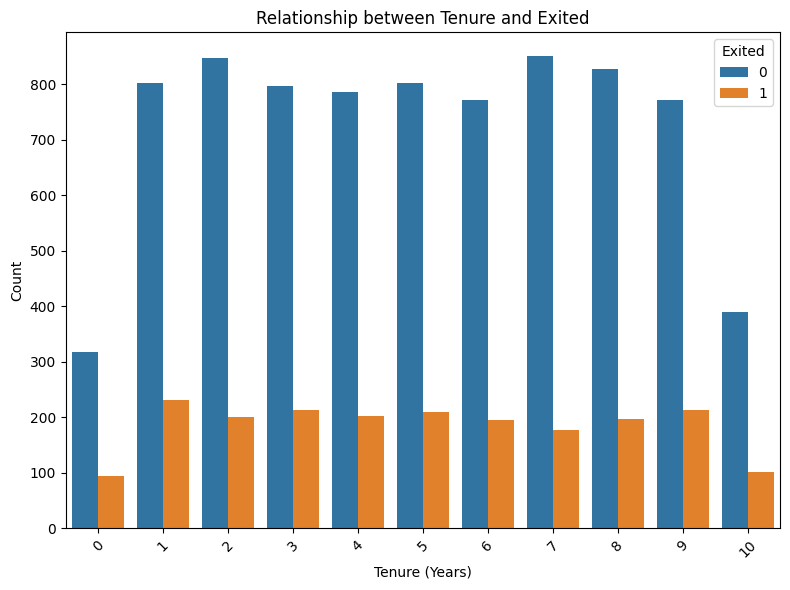

In [ ]:
palette = sns.color_palette("husl", 8)
# Scatter plot between balance and estimated_salary
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.title('Relationship between Tenure and Exited')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The observation that many customers have large estimated salaries but a zero balance in their account could be due to a variety of reasons. This can indicate different behaviors, preferences, or financial strategies of the customers such as :
* Some customers might receive their salary in a different bank or financial institution and only use this particular account for specific purposes (e.g., payments or loans)
* They might transfer their salary out of the account immediately after receiving it, leaving the balance at zero
* Customers might withdraw their salary for personal use (cash) or transfer it to savings or investment accounts, which can lead to a zero balance in this account.
* They might also be paying off credit card debt regularly, which could reduce the balance to zero despite having a large salary.


In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HasCrCard', y='CreditScore', data=df1, palette="Set2")
plt.title('Credit Score Distribution by Has Credit Card (Violin Plot)', fontsize=16)
plt.xlabel('Has Credit Card', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.show()


why some customers with no credit card have high credit scores (they might use other types of credit, such as loans or mortgages) and why some customers with a credit card might still have lower scores. ?

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='HasCrCard', y='EstimatedSalary', data=df1, palette="Set2")
plt.title('EstimatedSalary Distribution by Has Credit Card (Violin Plot)', fontsize=16)
plt.xlabel('Has Credit Card', fontsize=12)
plt.ylabel('EstimatedSalary', fontsize=12)
plt.show()

The distribution of estimated salaries for customers with and without a credit card is quite similar. Most customers fall within the mid-range salary bracket (around 100,000), and there doesn’t appear to be a noticeable difference between the two groups in terms of their estimated salary distributions.